In [1]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.image import resize
from rembg import remove
from PIL import Image
import matplotlib .pyplot as plt

In [2]:
model1 = load_model("ASL_Custom_model2.h5")
model2 = load_model("ASL_ResNet50_model.h5")
model3 = load_model("ASL_VGG16_model.h5")

In [3]:
# Dictionary to save our 36 classes
categories = {  0: "0",
                1: "1",
                2: "2",
                3: "3",
                4: "4",
                5: "5",
                6: "6",
                7: "7",
                8: "8",
                9: "9",
                10: "a",
                11: "b",
                12: "c",
                13: "d",
                14: "e",
                15: "f",
                16: "g",
                17: "h",
                18: "i",
                19: "j",
                20: "k",
                21: "l",
                22: "m",
                23: "n",
                24: "o",
                25: "p",
                26: "q",
                27: "r",
                28: "s",
                29: "t",
                30: "u",
                31: "v",
                32: "w",
                33: "x",
                34: "y",
                35: "z",
            }

In [4]:
# Background removal function
def remove_background(input_path, output_path):
    input_image = Image.open(input_path)
    # Assuming `remove` function removes the background and returns an RGBA image
    # You can convert it to RGB mode before saving
    output_image = remove(input_image)
    # Convert RGBA image to RGB mode
    output_image = output_image.convert("RGB")
    output_image.save(output_path)

In [5]:
# Function to predict the sign of the image 
def predict_with_ensemble(models, img_path):
    img_no_bg_path = "temp_no_bg.jpg"  # Temporary file to store the image without background
    remove_background(img_path, img_no_bg_path)

    # Load and preprocess the image
    img_width, img_height = 200, 200
    image_no_bg = image.load_img( img_no_bg_path, target_size=(img_width, img_height))
    img_array = image.img_to_array(image_no_bg)

    img_array /= 255.0 # normalize pixel values
    # Resize the image to match the model's input shape
    img_array_resized = resize(img_array, (img_width, img_height))


    # Expand dimensions to create a batch with a single image
    img_array_resized = np.expand_dims(img_array_resized, axis=0)
   
    all_predictions=[] # Stores each model predictions
    # Iterate through each model to get the image predictions
    for model in models:
        predictions = model.predict(img_array_resized)
        all_predictions.append(predictions)
    
    # Average voting
    avg_predictions = np.mean(all_predictions, axis=0)
    final_prediction = np.argmax(avg_predictions)
    # print(final_prediction)
    
    return final_prediction

### Testing on unseen data

In [11]:
models = [model1, model2,model3] # List of CNN models
img_path = r"C:\Users\ANBU NAMBI\Desktop\CSCI 6364\Project\input_images\input_images\C_test.jpg"
predicted_label = predict_with_ensemble(models, img_path)
print("Predicted label:", predicted_label)
print("Predicted sign:",categories[predicted_label])

1/1 [==============================] - 0s 24ms/step
Predicted label: 12
Predicted sign: c


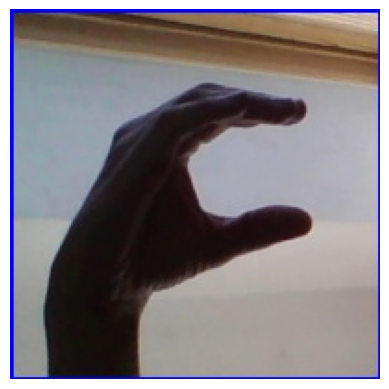

In [12]:
#Preview of image 
img = Image.open(img_path)
plt.imshow(img)
plt.axis('off')  
plt.show()